<a href="https://colab.research.google.com/github/Guled12345/Animations/blob/feature-branch/Water_Potability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from keras.regularizers import l1, l2
from sklearn.metrics import classification_report


In [ ]:
path = 'water_potability.csv'
df = pd.read_csv(path)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
X = df.drop('Potability', axis=1)  # Features
y = df['Potability'] #Target
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
y.head()

,Potability
0,0
1,0
2,0
3,0
4,0


In [ ]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
df.shape

(3276, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.dtypes

,0
ph,float64
Hardness,float64
Solids,float64
Chloramines,float64
Sulfate,float64
Conductivity,float64
Organic_carbon,float64
Trihalomethanes,float64
Turbidity,float64
Potability,int64


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.duplicated().any()

False

In [ ]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [ ]:
null_df = df.isnull().sum().reset_index()
null_df.columns = ['columns', 'null_count']
null_df['%miss_value'] = round(null_df['null_count']/len(df),2)*100
null_df

,columns,null_count,%miss_value
0,ph,491,15.0
1,Hardness,0,0.0
2,Solids,0,0.0
3,Chloramines,0,0.0
4,Sulfate,781,24.0
5,Conductivity,0,0.0
6,Organic_carbon,0,0.0
7,Trihalomethanes,162,5.0
8,Turbidity,0,0.0
9,Potability,0,0.0


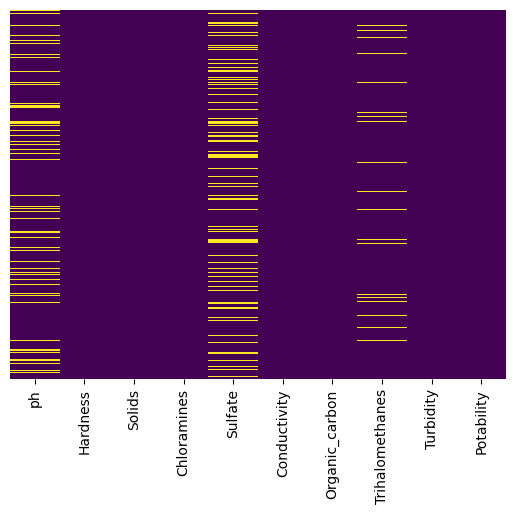

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.heatmap(df.isnull(),yticklabels= False, cbar = False, cmap = 'viridis')
plt.show()

# **Handling Missing Values in Data:**

<Axes: ylabel='Frequency'>

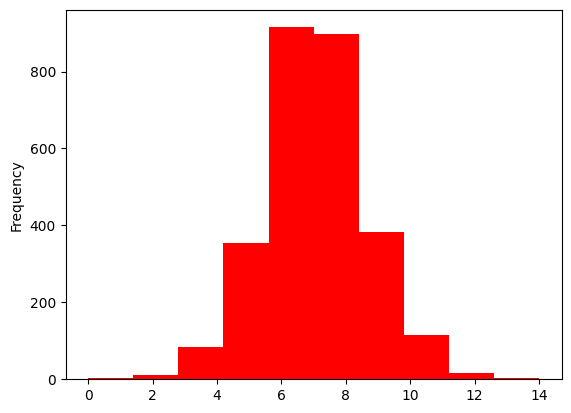

In [ ]:
df['ph'].plot(kind = 'hist', color = 'red')

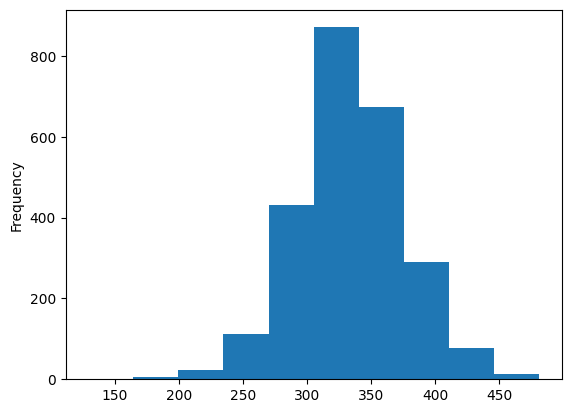

In [ ]:
df['Sulfate'].plot(kind = 'hist')
plt.show()

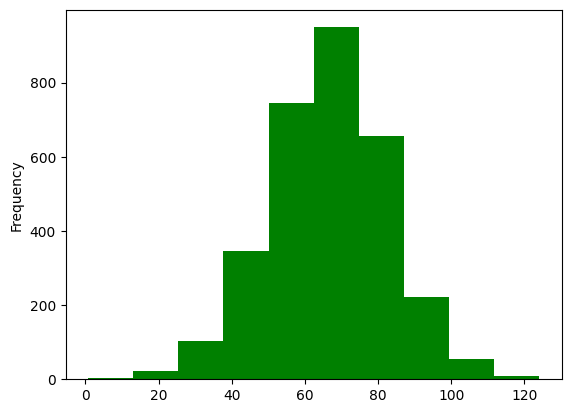

In [ ]:
df['Trihalomethanes'].plot(kind = 'hist', color = 'green')
plt.show()

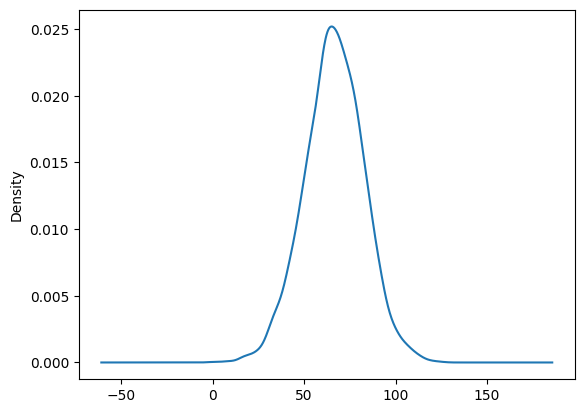

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Trihalomethanes'].plot(kind = 'kde', ax = ax)
plt.show()

In [ ]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())

In [ ]:
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


# **Check for correlation**

In [ ]:
corr_matrix = df.corr()
corr_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


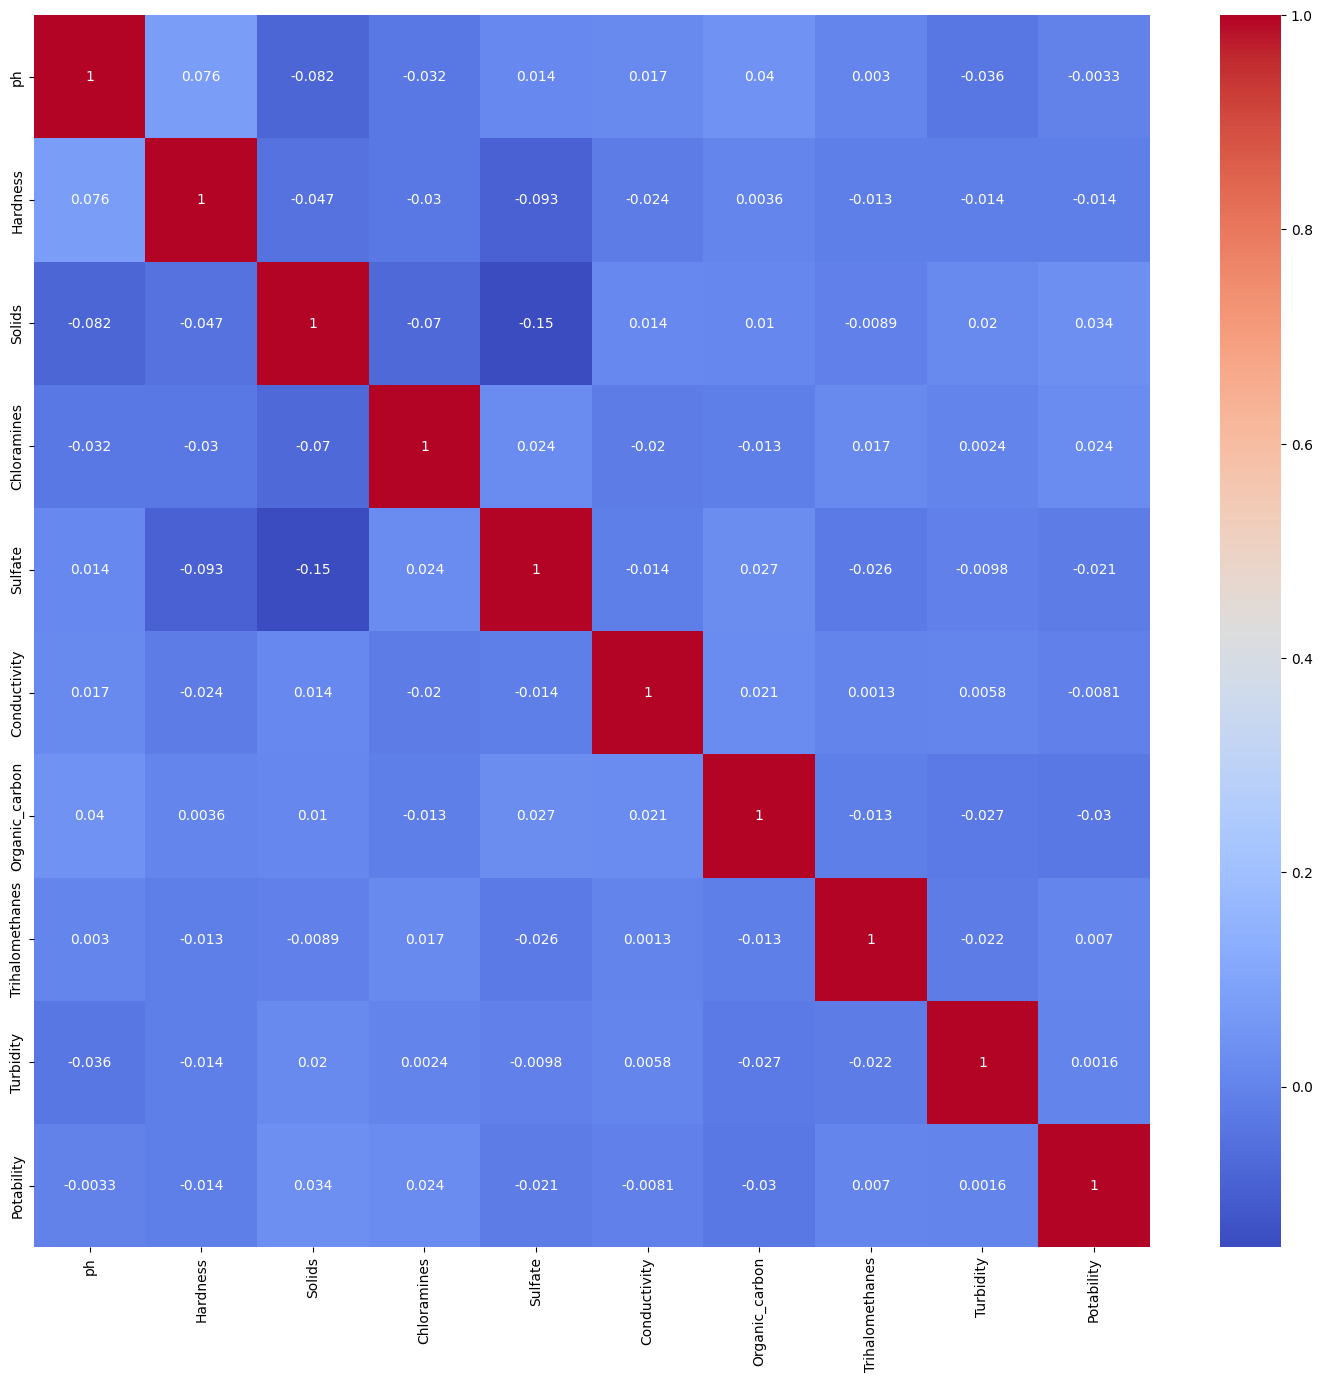

In [ ]:
plt.figure(figsize = (18,16))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

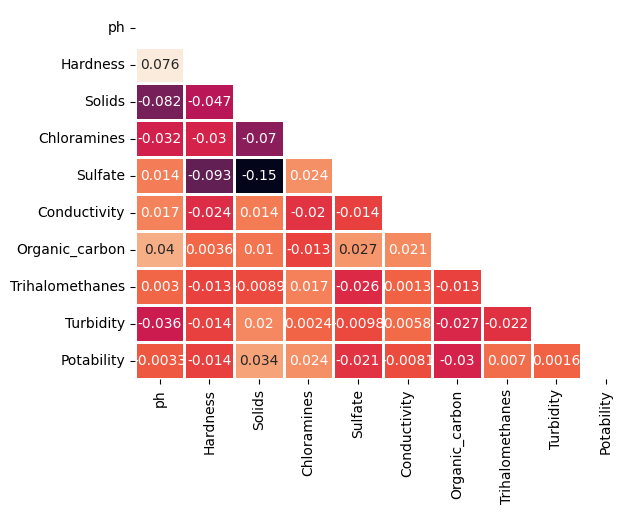

In [ ]:
matrix = np.triu(corr_matrix)
sns.heatmap(df.corr(),annot = True, linewidth=.8, mask = matrix, cmap = 'rocket',cbar = False)
plt.show()

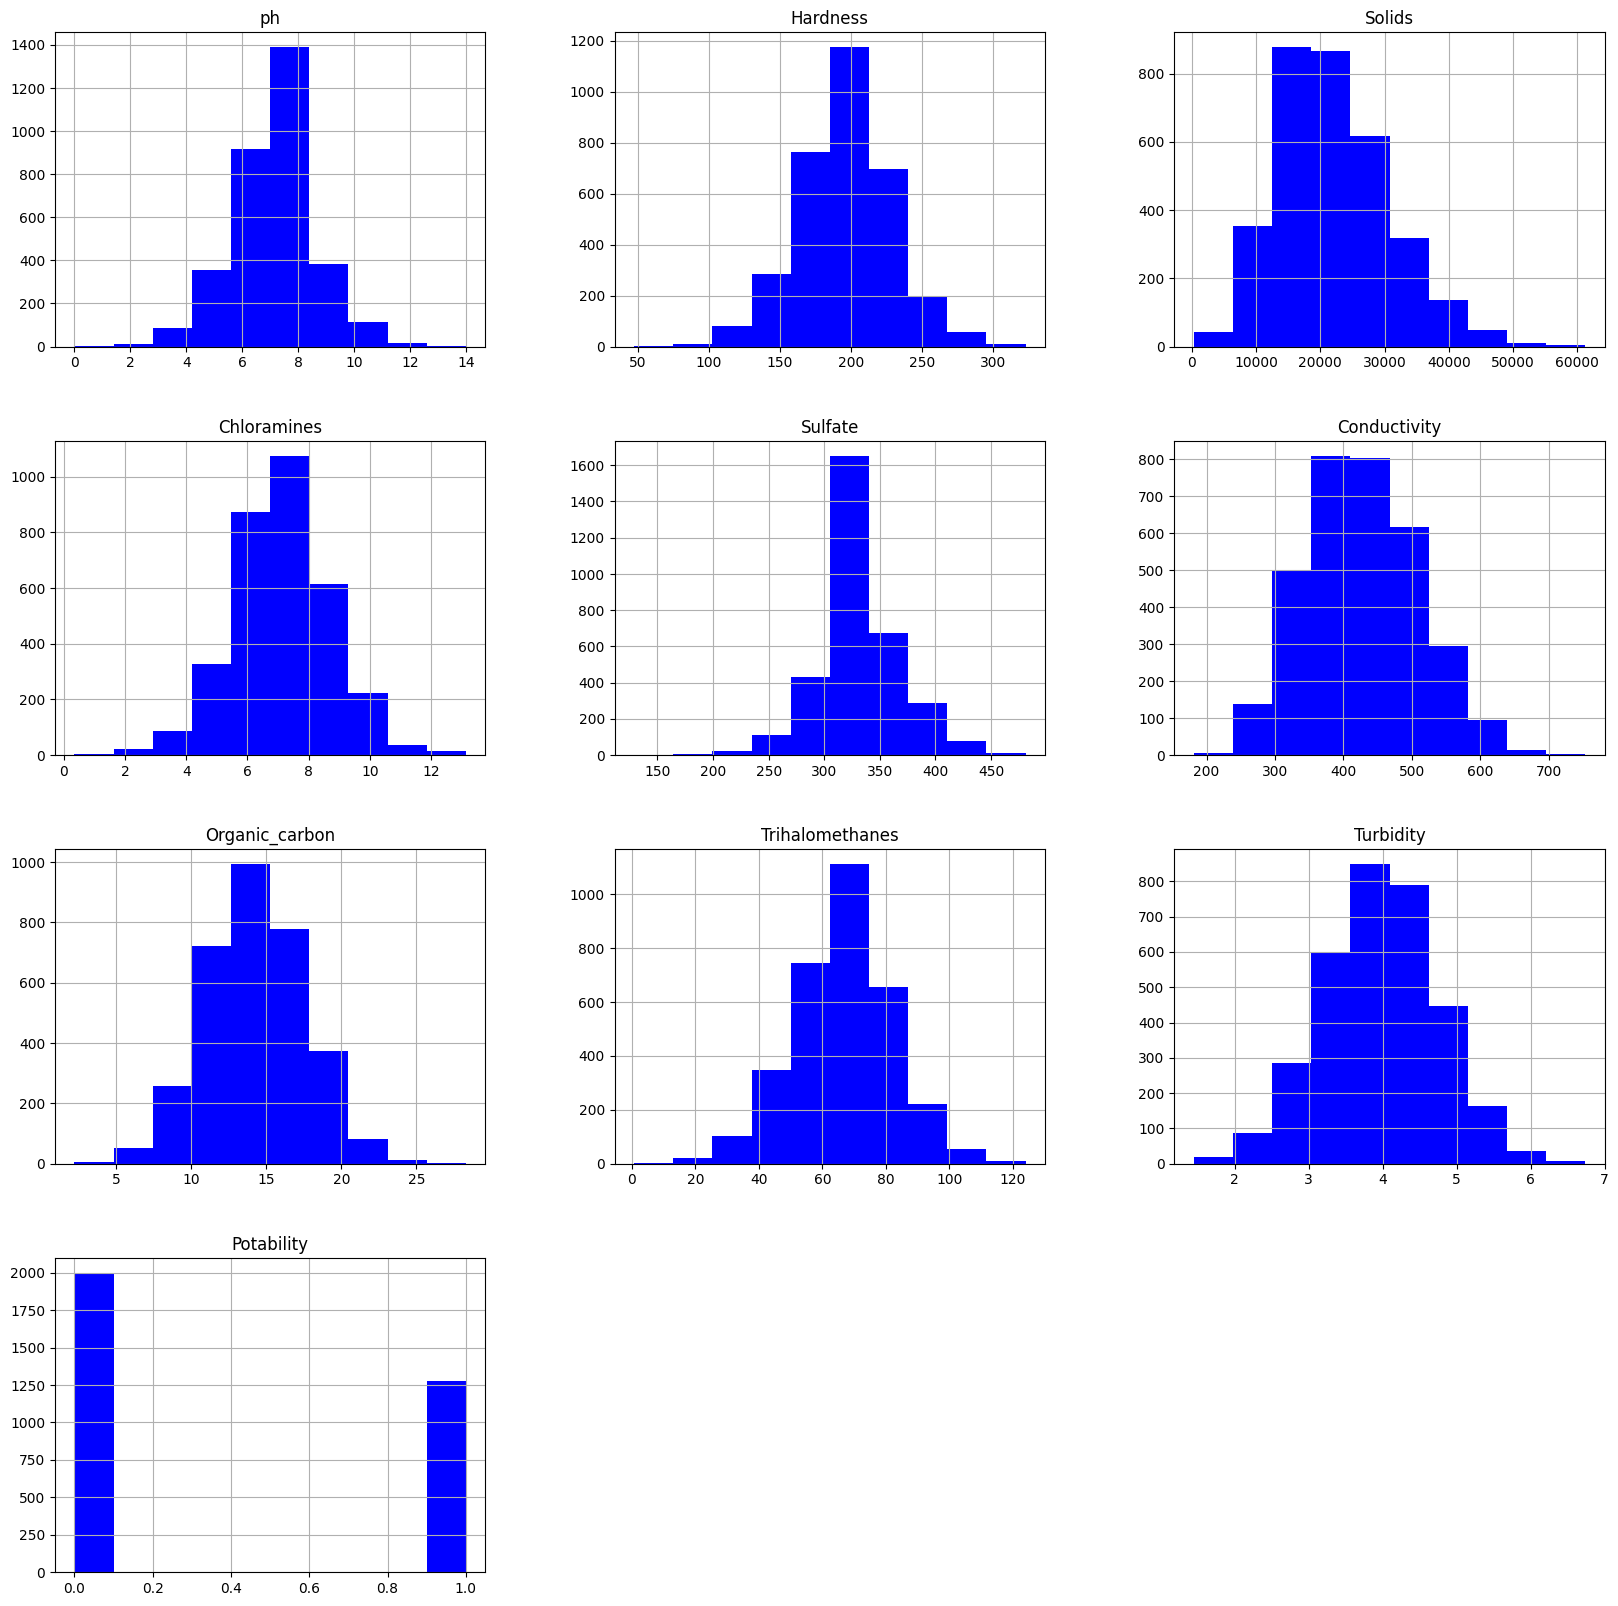

In [ ]:
data_hist_plot = df.hist(figsize = (20,20), color = 'blue')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


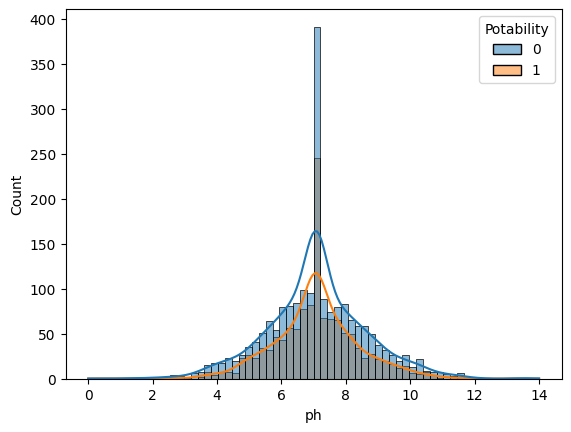

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


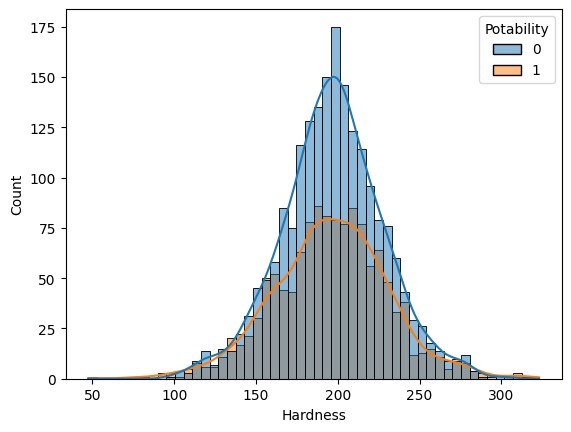

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


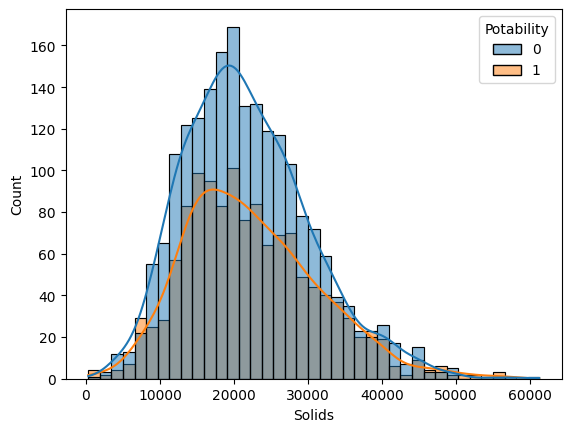

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


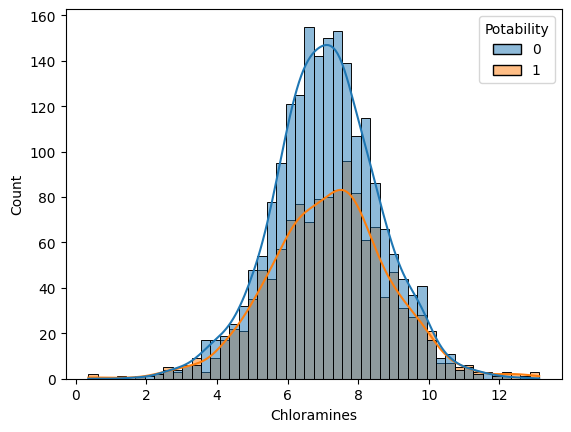

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


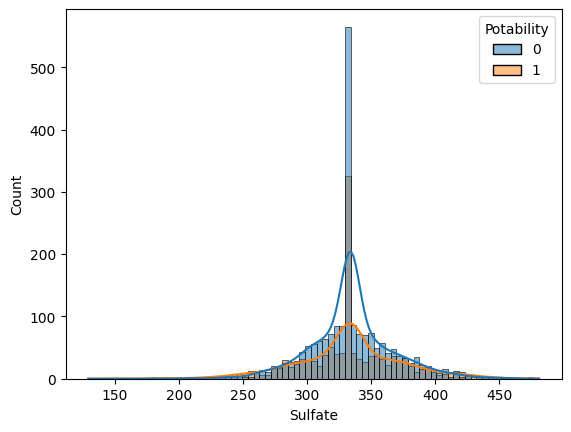

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


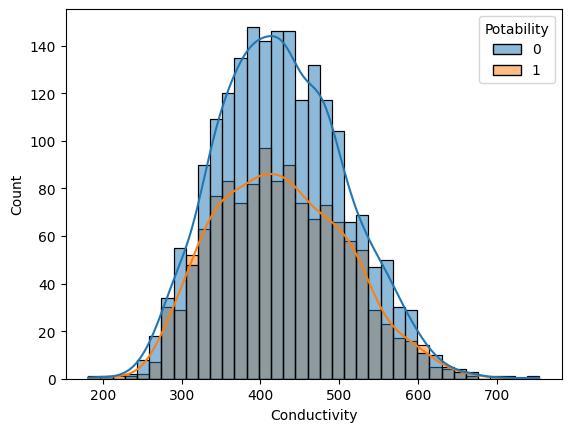

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


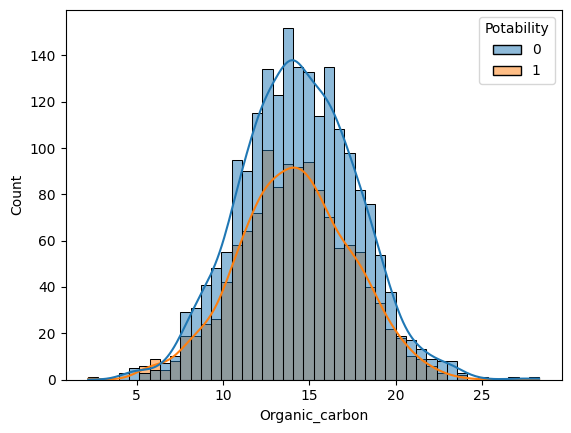

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


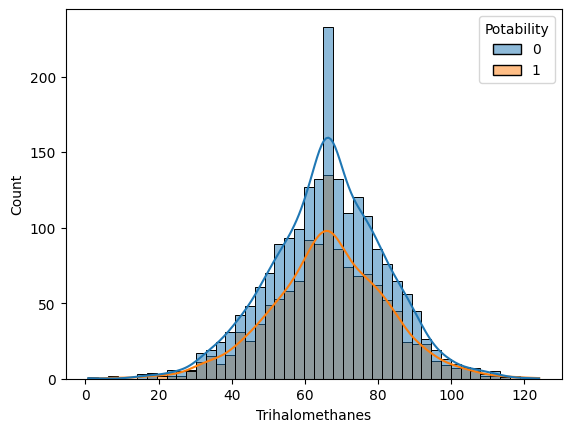

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


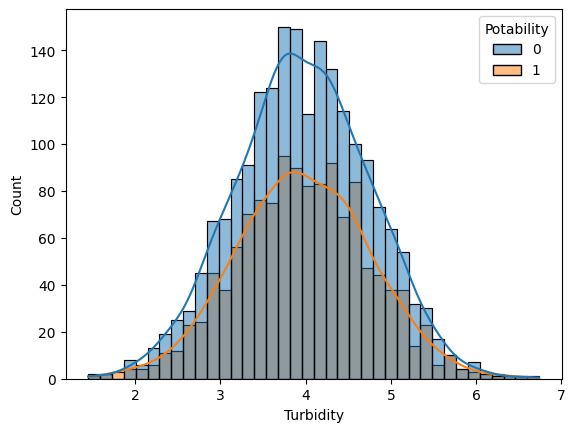

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


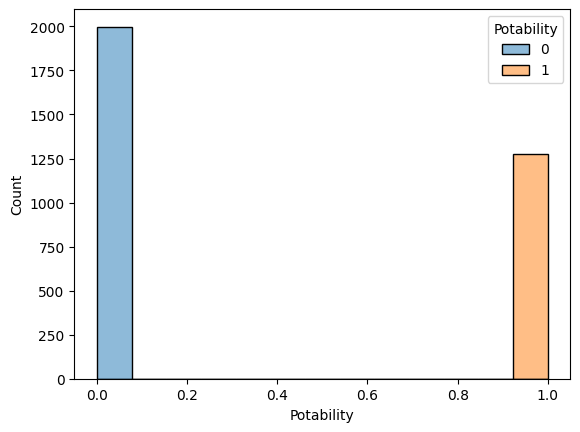

In [ ]:
for col in df.columns:
  sns.histplot(data = df, x = col, kde = True, hue = 'Potability')
  plt.show()

<Axes: xlabel='Potability'>

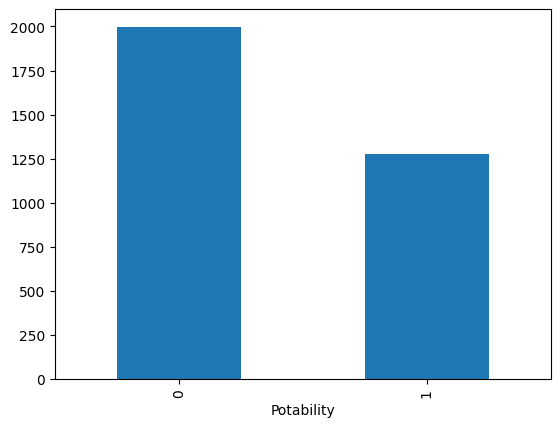

In [ ]:
df['Potability'].value_counts().plot(kind = 'bar')

# **Data Preprocessing**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd
df = pd.read_csv('water_potability.csv')

In [ ]:
print(df.columns)


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [ ]:
df = df.dropna(inplace=False)

# Fill with mean => best option
# df = df.fillna(df.median(), inplace=False)

#df = df.drop_duplicates(inplace=False)

#print(df.shape)
#print(df.head())

In [ ]:
from sklearn.preprocessing import StandardScaler

x = df.drop('Potability', axis = 1)
y = df['Potability']

std_scaler = StandardScaler()
x = pd.DataFrame(std_scaler.fit_transform(x), columns=x.columns)

print(x.tail())
print(y)


            ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
2006  1.210411  0.584770 -0.693978    -0.528284 -0.492625     -0.447578   
2007 -0.243774  0.347964 -0.540564     0.362137 -0.697038     -1.205321   
2008  2.800492 -3.100365  1.767503     1.343596 -1.803476      0.165656   
2009 -0.646160 -0.285317  0.488576     0.387023  0.302843     -0.131852   
2010 -1.537172 -0.070075  2.970287     0.020386  0.648718      1.238006   

      Organic_carbon  Trihalomethanes  Turbidity  
2006       -1.341281        -0.705001   0.825626  
2007        0.559422        -2.334474  -0.675183  
2008        0.546021        -1.545585   0.512125  
2009       -0.688929        -0.372108  -0.384562  
2010       -0.139372         0.017846   0.597437  
3       0
4       0
5       0
6       0
7       0
       ..
3267    1
3268    1
3269    1
3270    1
3271    1
Name: Potability, Length: 2011, dtype: int64


In [ ]:
#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

#print(df_scaled.head())

In [ ]:
#y = df_scaled['Potability']
#x = df_scaled.drop('Potability', axis=1)

#print(x.shape)
#print(y.shape)

In [ ]:
#from sklearn.model_selection import train_test_split

#x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2)
#x_test, x_val, y_test, y_val = train_test_split(x_temp, y_temp, test_size=0.2)

#print(x_train.shape)
#print(x_val.shape)
#print(x_test.shape)

In [ ]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [ ]:
y.head()

,Potability
3,0
4,0
5,0
6,0
7,0


**Training and testing Dataset**

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.optimizers import Adam
from keras.layers import Dropout, Dense, BatchNormalization, Input
from sklearn.model_selection import train_test_split
from keras.regularizers import l2
from keras.models import Sequential

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
#import tensorflow as tf
#mnist = tf.keras.datasets.mnist

In [ ]:
#train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train)).batch(32)
#test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test)).batch(32)

In [ ]:
#for batch_features, batch_labels in train_dataset.take(1):  # Take 1 batch to inspect
    #print("Batch features (X_train_scaled):\n", batch_features.numpy())
    #print("\nBatch labels (y_train):\n", batch_labels.numpy())

In [ ]:
#(x_train, y_train),(x_test, y_test) = mnist.load_data()
#x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
#X_train.shape, X_test.shape

# Model Architecture

In [ ]:
#model = Sequential()
#model.add(Dense(256, input_dim=x_train.shape[1], activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.4))

#model.add(Dense(128, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.4))

#model.add(Dense(64, activation='relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.3))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

In [ ]:
print(type(x_train), type(y_train))
print(x_train.shape, y_train.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(1407, 9) (1407,)


In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping, reduce_lr], verbose=1)

Epoch 1/100


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 64)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.regularizers import l1, l2

model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(64, activation='relu' ),
    Dropout(0.5),
    Dense(32, activation='relu' ),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [ ]:
from sklearn.utils import class_weight
import numpy as np
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = {0: class_weights[0], 1: class_weights[1]}

Compiling the model

In [ ]:
from keras.optimizers import Adam
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
es = EarlyStopping(
    monitor="val_loss", patience=20, verbose=2, mode="auto"
)

Trainning

In [ ]:
print(type(x_train), type(y_train))
print(x_train.shape, y_train.shape)


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(1407, 9) (1407,)


In [ ]:
model.fit(x_train, y_train, epochs=150, batch_size=32, validation_split=0.2, callbacks=[es])

Epoch 1/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4774 - loss: 0.7322 - val_accuracy: 0.5461 - val_loss: 0.6874
Epoch 2/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5941 - loss: 0.6851 - val_accuracy: 0.5638 - val_loss: 0.6825
Epoch 3/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5670 - loss: 0.6837 - val_accuracy: 0.5745 - val_loss: 0.6816
Epoch 4/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5808 - loss: 0.6763 - val_accuracy: 0.5816 - val_loss: 0.6797
Epoch 5/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5958 - loss: 0.6739 - val_accuracy: 0.5816 - val_loss: 0.6773
Epoch 6/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6269 - loss: 0.6657 - val_accuracy: 0.5780 - val_loss: 0.6744
Epoch 7/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6301 - loss: 0.6598 - val_accuracy: 0.5887 - val_loss: 0.6718
Epoch 8/150
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5986 - loss: 0.6711 - val_accuracy: 0.5922 - v

Evaluation

In [ ]:
model.save('model.keras')

In [ ]:
y_pred_prob = model.predict(x_test)
y_pred_classes = (y_pred_prob > 0.5).astype(int)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


classfiaction

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_classes))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75       360
           1       0.00      0.00      0.00       244

    accuracy                           0.60       604
   macro avg       0.30      0.50      0.37       604
weighted avg       0.36      0.60      0.45       604



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(y.value_counts())


Potability
0    1998
1    1278
Name: count, dtype: int64
